Referências:

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://github.com/s-miller/Spam-classification-comparing-Naive-Bayes-vs-random-forest-and-playing-around-with-sklearn-pipeline/blob/master/Spam%20classification%20comparing%20Naive%20Bayes%20vs%20random%20forest%20(and%20playing%20around%20with%20sklearn%20pipelining).ipynb

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def process_text(txt:str):
    '''Função que recebe o tweet e remove stopwords'''
    return [word for word in txt.split() if word not in stopwords.words('portuguese')]

In [3]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [4]:
tt = pd.read_csv('DebateGovRS_Anotado.xlsx - DebateGovRS_Anotado.csv').fillna(2)
tt.head()

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,RT @EdegarPretto O meu candidato vice-governad...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,Periga o Argenta chamar o Simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,RT @WinstonLing Segue o link para assistirem o...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,RT @EdegarPretto Eu quero dizer aos gaúchos e ...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0


In [5]:
'''Seleciona somente os tweets classificados'''
tt = tt.loc[tt['sinal'].notna()]
tt.head()

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,RT @EdegarPretto O meu candidato vice-governad...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,Periga o Argenta chamar o Simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,RT @WinstonLing Segue o link para assistirem o...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,RT @EdegarPretto Eu quero dizer aos gaúchos e ...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0


In [6]:
'''Remove acentos e caracteres especiais / Coloca em minúscula'''
tt['text'] = tt['text'].str.lower().str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')
tt['text']

0       rt @edegarpretto o meu candidato vice-governad...
1       periga o argenta chamar o simon pra responder ...
2       rt @winstonling segue o link para assistirem o...
3       rt @edegarpretto eu quero dizer aos gauchos e ...
4       @wmfigueiredo @evertonvf @bandrs @eduardoleite...
                              ...                        
2995    rt @josenery53 @sigapepevargas @dilmaresiste @...
2996                            @onyxlorenzoni realmente 
2997    rt @bandrs band mantem tradicao e realiza o pr...
2998    rt @edegarpretto o debate comecou e voce pode ...
2999    @edegarpretto tem 51 anos e nasceu em miraguai...
Name: text, Length: 3000, dtype: object

In [7]:
'''Remove '\n', @, RT, #'''
tt['text'] = tt['text'].replace(to_replace=r'\\n',value=' ',regex=True)
tt['text'] = tt['text'].replace(to_replace=r'(?<!\w)@[\w+]{1,100}\b',value='',regex=True)
tt['text'] = tt['text'].replace(to_replace=r'^rt\s',value='',regex=True)
tt['text'] = tt['text'].replace(to_replace=r'(?<!\w)#[\w+]{1,100}\b',value='',regex=True)
tt

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,o meu candidato vice-governador e o fundador...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,periga o argenta chamar o simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,segue o link para assistirem o debate de hoje...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,eu quero dizer aos gauchos e gauchas que se e...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,aos que gostam governador atual quando for...,0.0
...,...,...,...,...,...,...,...
2995,"1,46E+18",2022-08-08T00:00:05Z,"1,56E+18",und,1,13,2.0
2996,"1,37E+18",2022-08-08T00:00:05Z,"1,56E+18",pt,0,realmente,2.0
2997,"1,19E+18",2022-08-08T00:00:04Z,"1,56E+18",pt,244,band mantem tradicao e realiza o primeiro deb...,2.0
2998,54790300,2022-08-08T00:00:01Z,"1,56E+18",pt,20,o debate comecou e voce pode acompanhar todos...,2.0


In [8]:
'''Remove espaços desnecessários'''
tt['text'] = tt['text'].str.rstrip().str.lstrip().str.replace('  ',' ')

In [9]:
'''Remove textos vazios'''
tt = tt[tt['text']!='']
tt

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,o meu candidato vice-governador e o fundador t...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,periga o argenta chamar o simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,segue o link para assistirem o debate de hoje ...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,eu quero dizer aos gauchos e gauchas que se eu...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,aos que gostam governador atual quando forem p...,0.0
...,...,...,...,...,...,...,...
2995,"1,46E+18",2022-08-08T00:00:05Z,"1,56E+18",und,1,13,2.0
2996,"1,37E+18",2022-08-08T00:00:05Z,"1,56E+18",pt,0,realmente,2.0
2997,"1,19E+18",2022-08-08T00:00:04Z,"1,56E+18",pt,244,band mantem tradicao e realiza o primeiro deba...,2.0
2998,54790300,2022-08-08T00:00:01Z,"1,56E+18",pt,20,o debate comecou e voce pode acompanhar todos ...,2.0


In [10]:
'''Remove registros repetidos'''
tt = tt.drop_duplicates(subset=['text'])
tt.reset_index(drop=True,inplace=True)
tt

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,o meu candidato vice-governador e o fundador t...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,periga o argenta chamar o simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,segue o link para assistirem o debate de hoje ...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,eu quero dizer aos gauchos e gauchas que se eu...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,aos que gostam governador atual quando forem p...,0.0
...,...,...,...,...,...,...,...
1618,17231726,2022-08-08T00:00:15Z,"1,56E+18",pt,1,economia solidaria esta incluida nos temas que...,2.0
1619,17231726,2022-08-08T00:00:11Z,"1,56E+18",pt,1,os jovens da roca nao querem ser agricultores ...,2.0
1620,120241898,2022-08-08T00:00:09Z,"1,56E+18",pt,0,uma otima oportunidade para o pessoal conhecer o,2.0
1621,"1,46E+18",2022-08-08T00:00:05Z,"1,56E+18",und,1,13,2.0


In [11]:
text_train, text_test, sinal_train, sinal_test = train_test_split(tt.text,tt.sinal,test_size=0.3)

In [12]:
'''Cria o bag of words'''
bow_transformer = CountVectorizer(analyzer=process_text)
# df_bow_train = bow_transformer.fit_transform(text_train)

In [13]:
'''tfid'''
tfidf_transformer = TfidfTransformer()
# messages_tfidf = tfidf_transformer.fit_transform(df_bow_train)

In [14]:
'''Suppor Vector Classifier Pipeline'''
svc_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', SVC())
    ])

In [15]:
'''Random Forest Pipeline'''
rfc_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', RandomForestClassifier(50))
    ])

In [16]:
svc_pipeline.fit(text_train,sinal_train)
svc_pred = svc_pipeline.predict(text_test)

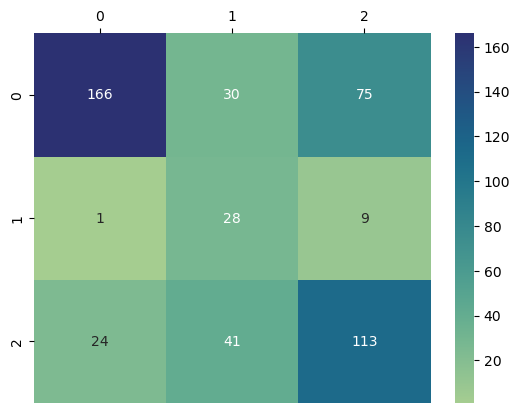

              precision    recall  f1-score   support

         0.0       0.87      0.61      0.72       271
         1.0       0.28      0.74      0.41        38
         2.0       0.57      0.63      0.60       178

    accuracy                           0.63       487
   macro avg       0.58      0.66      0.58       487
weighted avg       0.72      0.63      0.65       487



In [17]:
'''Confusion matrix'''
svc_cm = confusion_matrix(svc_pred,sinal_test)
sns.heatmap(svc_cm,annot=True,cmap="crest",fmt='d').xaxis.tick_top()
plt.show()

'''Classification Report'''
svc_cr = classification_report(svc_pred,sinal_test)
print(svc_cr)

In [18]:
rfc_pipeline.fit(text_train,sinal_train)
rfc_pred = rfc_pipeline.predict(text_test)

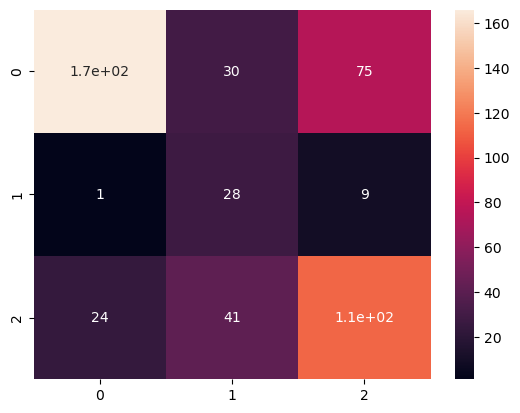

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65       196
         1.0       0.54      0.38      0.44       140
         2.0       0.44      0.58      0.50       151

    accuracy                           0.55       487
   macro avg       0.55      0.53      0.53       487
weighted avg       0.56      0.55      0.54       487



In [19]:
'''Confusion matrix'''
rfc_cm = confusion_matrix(rfc_pred,sinal_test)
sns.heatmap(svc_cm,annot=True)
plt.show()

'''Classification Report'''
rfc_cr = classification_report(rfc_pred,sinal_test)
print(rfc_cr)

In [20]:
# df_bow = bow_transformer.fit_transform(text_test)
# svc_pipeline.predict(tfidf_transformer.fit_transform(text_test))


In [21]:
# messages_tfidf = tfidf_transformer.transform(df_bow)

In [22]:
# x = messages_tfidf
# y = tt.sinal

In [23]:
# x_train, x_test, y_train, y_test = train_test_split(tt.text,tt.sinal,test_size=0.3)

In [24]:
# svc_pipeline.fit(text_train, sinal_train)

In [25]:
# text_pred = svc_pipeline.fit(text_test)

In [26]:
# print(confusion_matrix(text_test,text_pred))

In [27]:
# print(classification_report(text_test, text_pred))

In [28]:
# pipeline_rfc = Pipeline([
#         ('bow', CountVectorizer(analyzer=process_text)),
#         ('tfidf', TfidfTransformer()),
#         ('classifier', RandomForestClassifier(50))
#     ])

In [29]:
# pipeline_rfc.fit(x_train, y_train)
# y_pred = pipeline_rfc.predict(x_test)

In [30]:
# print(confusion_matrix(y_test,y_pred))

In [31]:
# print(classification_report(y_test, y_pred))